<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Assignment-#9-." data-toc-modified-id="Assignment-#9-.-1">Assignment #9 .</a></span><ul class="toc-item"><li><span><a href="#Time-series-analysis" data-toc-modified-id="Time-series-analysis-1.1">Time series analysis</a></span></li><li><span><a href="#Data-preparation" data-toc-modified-id="Data-preparation-1.2">Data preparation</a></span></li><li><span><a href="#Predicting-with-FB-Prophet" data-toc-modified-id="Predicting-with-FB-Prophet-1.3">Predicting with FB Prophet</a></span><ul class="toc-item"><li><span><a href="#Question-1:-What-is-the-prediction-for-1st-of-January-17-00:00:00?" data-toc-modified-id="Question-1:-What-is-the-prediction-for-1st-of-January-17-00:00:00?-1.3.1"><font color="red">Question 1:</font> What is the prediction for 1st of January 17 00:00:00?</a></span></li><li><span><a href="#Question-2:-What-is-MAPE-equal-to?" data-toc-modified-id="Question-2:-What-is-MAPE-equal-to?-1.3.2"><font color="red">Question 2:</font> What is MAPE equal to?</a></span></li><li><span><a href="#Question-3:-What-is-MAE-equal-to?" data-toc-modified-id="Question-3:-What-is-MAE-equal-to?-1.3.3"><font color="red">Question 3:</font> What is MAE equal to?</a></span></li></ul></li><li><span><a href="#Predicting-with-ARIMA" data-toc-modified-id="Predicting-with-ARIMA-1.4">Predicting with ARIMA</a></span><ul class="toc-item"><li><span><a href="#Question-4:-What's-the-stationarity?" data-toc-modified-id="Question-4:-What's-the-stationarity?-1.4.1"><font color="red">Question 4:</font> What's the stationarity?</a></span></li><li><span><a href="#Question-5:-Best-hyperparameters-before-Box-Cox-transformation?" data-toc-modified-id="Question-5:-Best-hyperparameters-before-Box-Cox-transformation?-1.4.2"><font color="red">Question 5:</font> Best hyperparameters before Box-Cox transformation?</a></span></li><li><span><a href="#Question-6:-Best-hyperparameters-after-Box-Cox-transformation?" data-toc-modified-id="Question-6:-Best-hyperparameters-after-Box-Cox-transformation?-1.4.3"><font color="red">Question 6:</font> Best hyperparameters after Box-Cox transformation?</a></span></li><li><span><a href="#Question-7:-Draw-final-prediction-and-historical-data" data-toc-modified-id="Question-7:-Draw-final-prediction-and-historical-data-1.4.4"><font color="red">Question 7:</font> Draw final prediction and historical data</a></span></li></ul></li></ul></li></ul></div>

<center>
<img src="https://habrastorage.org/files/fd4/502/43d/fd450243dd604b81b9713213a247aa20.jpg">
## [mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
<center>Author: [Mariya Mansurova](https://www.linkedin.com/in/mariya-mansurova-04070982/), analyst & developer in Yandex.Metrics team. <br>Translated by [Ivan Zakharov](https://www.linkedin.com/in/ivan-zakharov/), ML enthusiast.
<br>All content is distributed under the [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/) license.

# Assignment #9 . 
## Time series analysis

<font color='red'>Fill cells marked with "Your code here" and write answer below question after text "Type your answer here:"
    </font>    

In [1]:
pip install fbprophet -U

Requirement already up-to-date: fbprophet in /Users/Maitha/anaconda3/lib/python3.7/site-packages (0.6)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tqdm

Note: you may need to restart the kernel to use updated packages.


In [3]:
### import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import tqdm
from tqdm import tqdm


from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly import graph_objs as go
import requests

from plotly import __version__
print(__version__) # need 1.9.0 or greater
init_notebook_mode(connected = True)


def plotly_df(df, title = ''):
    data = []
    
    for column in df.columns:
        trace = go.Scatter(
            x = df.index,
            y = df[column],
            mode = 'lines',
            name = column
        )
        data.append(trace)
    
    layout = dict(title = title)
    fig = dict(data = data, layout = layout)
    iplot(fig, show_link=False)

4.6.0


## Data preparation

In [4]:
df = pd.read_csv('hour_online.csv')
df = df[df['Users'] != 0]
df.head()

,Time,Users
0,1/1/17 0:00,34002
1,1/1/17 1:00,37947
2,1/1/17 2:00,41517
3,1/1/17 3:00,44476
4,1/1/17 4:00,46234


In [5]:
df.shape

(2616, 2)

## Predicting with FB Prophet
We will train at first 5 months and predict the number of trips for June.

In [6]:
df.Time = pd.to_datetime(df.Time)


In [7]:
plotly_df(df.set_index('Time')[["Users"]])

In [8]:
from fbprophet import Prophet

In [9]:
predictions = 30

df.columns = ['ds', 'y']
df.tail()

,ds,y
2620,2017-04-20 05:00:00,34833
2621,2017-04-20 06:00:00,35932
2622,2017-04-20 07:00:00,38418
2623,2017-04-20 08:00:00,40238
2624,2017-04-20 09:00:00,40763


In [10]:
train_df = df[:-predictions].copy()

In [11]:
m = Prophet()
m.fit(train_df);

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [12]:
future = m.make_future_dataframe(periods=predictions, freq = 'H')
future.tail()

,ds
2611,2017-04-20 05:00:00
2612,2017-04-20 06:00:00
2613,2017-04-20 07:00:00
2614,2017-04-20 08:00:00
2615,2017-04-20 09:00:00


In [13]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2611,2017-04-20 05:00:00,35313.552909,37320.577298,48605.941304,35306.024542,35344.881756,7401.138199,7401.138199,7401.138199,8788.263876,8788.263876,8788.263876,-1387.125677,-1387.125677,-1387.125677,0.0,0.0,0.0,42714.691108
2612,2017-04-20 06:00:00,35322.168780,39456.629789,50858.433049,35309.776213,35360.019247,10094.722149,10094.722149,10094.722149,11417.666438,11417.666438,11417.666438,-1322.944289,-1322.944289,-1322.944289,0.0,0.0,0.0,45416.890929
2613,2017-04-20 07:00:00,35330.784651,41238.283231,53217.836290,35313.085317,35372.383833,11946.979577,11946.979577,11946.979577,13203.364932,13203.364932,13203.364932,-1256.385356,-1256.385356,-1256.385356,0.0,0.0,0.0,47277.764228
2614,2017-04-20 08:00:00,35339.400522,42997.643666,54763.000442,35315.287246,35397.395715,13551.414423,13551.414423,13551.414423,14739.078775,14739.078775,14739.078775,-1187.664352,-1187.664352,-1187.664352,0.0,0.0,0.0,48890.814945
2615,2017-04-20 09:00:00,35348.016393,44889.208098,55782.424480,35316.393826,35418.679215,14838.393219,14838.393219,14838.393219,15955.382618,15955.382618,15955.382618,-1116.989399,-1116.989399,-1116.989399,0.0,0.0,0.0,50186.409613


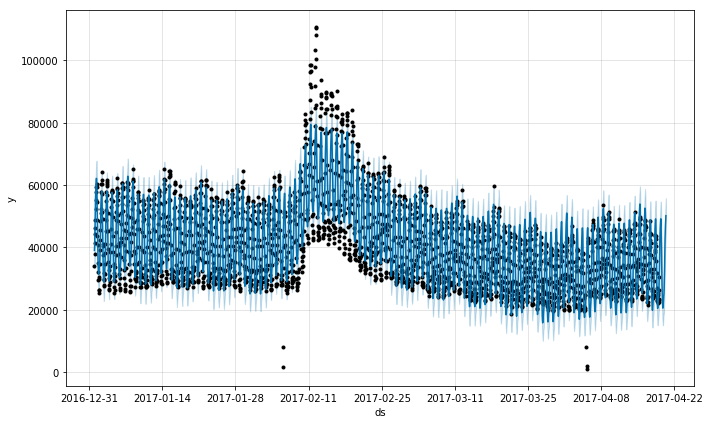

In [14]:
m.plot(forecast);

### <font color='red'>Question 1:</font> What is the prediction for 1st of January 17 00:00:00?

What is the prediction of the number of views of the wiki page on 1st of January 17? Round to the nearest integer.

- **yhat = 39050.6 views estimated** 


In [15]:
forecast.loc[forecast['ds'] == '2017-01-01 00:00:00']

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-01-01,44112.968171,33405.375274,44588.932888,44112.968171,44112.968171,-5062.335471,-5062.335471,-5062.335471,-8486.165172,-8486.165172,-8486.165172,3423.829701,3423.829701,3423.829701,0.0,0.0,0.0,39050.6327


Estimate the quality of the prediction with the last 30 points.

### <font color='red'>Question 2:</font> What is MAPE equal to?

- 12.69

### <font color='red'>Question 3:</font> What is MAE equal to?

- 4349.67 


In [16]:
cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(df.set_index('ds'))

In [17]:
cmp_df['e'] = cmp_df['y'] - cmp_df['yhat']
cmp_df['p'] = 100 * cmp_df['e'] / cmp_df['y']

In [18]:
print('MAPE is ', round(np.mean(abs(cmp_df [-predictions:]['p'])), 2))
print('MAE is ',  round(np.mean(abs(cmp_df [-predictions:]['e'])), 2))

MAPE is  12.69
MAE is  4349.67


## Predicting with ARIMA

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (15, 10)

### <font color='red'>Question 4:</font> What's the stationarity?

Let's verify the stationarity of the series using the Dickey-Fuller test. Is the series stationary? What is the p-value?

- Is the series stationary (yes/no)? Answer: No, we cannot reject the null hypothesis since p-value is larger than 0.05
- What is p_value? Answer: p = 0.240004

Dickey-Fuller test: p=0.240004


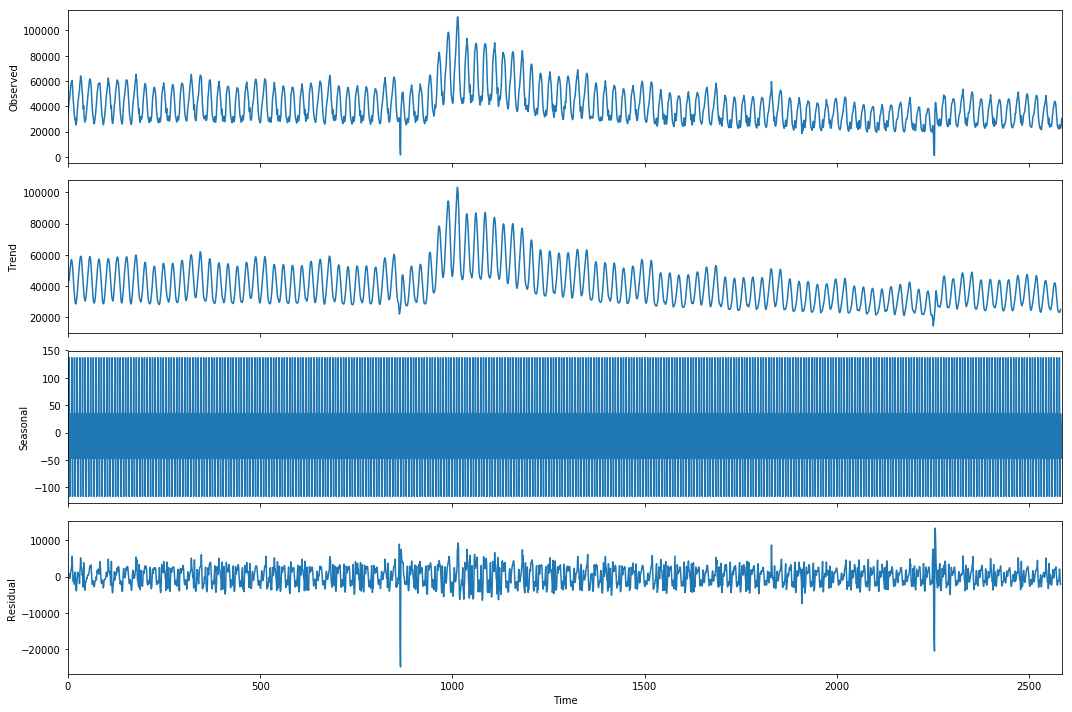

In [20]:
sm.tsa.seasonal_decompose(train_df['y'].values, freq=7).plot();
print("Dickey-Fuller test: p=%f" % sm.tsa.stattools.adfuller(train_df['y'])[1])

**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> 
### <font color='red'>Question 5:</font> Best hyperparameters before Box-Cox transformation?

Try 1st and 2nd diff.

What parameters are the best for the model according to the `AIC` criterion?

Choose one option:

- p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1
- p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1
- **p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1**
- p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2




In [21]:
warnings.filterwarnings('ignore')
models = []
best_aic = float("inf")
tuple_ = (3, 0, 2, 2, 1, 1),(3, 1, 6, 2, 1, 1),(5, 1, 6, 1, 0, 1),(7, 0, 7, 2, 2, 2)

for x in (tuple_):
    print("model parameters (p,d,q,P,D,Q) =",x)
    model=sm.tsa.statespace.SARIMAX(train_df['y'], order=(x[0], x[1], x[2]),
                                seasonal_order=(x[3], x[4], x[5],8), enforce_stationarity= False, enforce_invertibility= False).fit(disp=-1)
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = x
        models.append([best_param, best_aic])
models_results_before_boxcox = pd.DataFrame(
    models,columns=['parameters', 'aic']).sort_values(by='aic',
                                                      ascending=True).reset_index(drop=True)

model parameters (p,d,q,P,D,Q) = (3, 0, 2, 2, 1, 1)
model parameters (p,d,q,P,D,Q) = (3, 1, 6, 2, 1, 1)
model parameters (p,d,q,P,D,Q) = (5, 1, 6, 1, 0, 1)
model parameters (p,d,q,P,D,Q) = (7, 0, 7, 2, 2, 2)


In [22]:
models_results_before_boxcox

,parameters,aic
0,"(5, 1, 6, 1, 0, 1)",47244.301509
1,"(3, 0, 2, 2, 1, 1)",47640.791070


In [23]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                                 y   No. Observations:                 2586
Model:             SARIMAX(5, 1, 6)x(1, 0, 1, 8)   Log Likelihood              -23608.151
Date:                           Thu, 28 May 2020   AIC                          47244.302
Time:                                   21:39:21   BIC                          47326.225
Sample:                                        0   HQIC                         47274.002
                                          - 2586                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3386      0.145      2.330      0.020       0.054       0.623
ar.L2          0.6248      0.116      5.363      0.000       0.396       0.853
ar.L3          0.7289      0.087      8.413      0.000       0.559       0.899
ar.L4         -0.5606      0.098     -5.719      0.000      -0.753      -0.368
ar.L5         -0.4291      0.131     -3.278      0.001      -0.686      -0.173
ma.L1         -0.1962      0.145     -1.356      0.175      -0.480       0.087
ma.L2         -0.8960      0.093     -9.614      0.000      -1.079      -0.713
ma.L3         -0.9050      0.119     -7.636      0.000      -1.137      -0.673
ma.L4          0.4112      0.111      3.705      0.000       0.194       0.629
ma.L5          0.6823      0.109      6.287      0.000       0.470       0.895
ma.L6          0.0392      0.046      0.858      0.391      -0.050       0.129
ar.S.L8       -0.5531      0.048    -11.545      0.000      -0.647      -0.459
ma.S.L8        0.7745      0.036     21.695      0.000       0.705       0.844
sigma2      6.327e+06    4.5e-07    1.4e+13      0.000    6.33e+06    6.33e+06
===================================================================================
Ljung-Box (Q):                      585.87   Jarque-Bera (JB):             45928.41
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.03   Skew:                             0.80
Prob(H) (two-sided):                  0.66   Kurtosis:                        23.65
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.51e+27. Standard errors may be unstable.
"""

**Next, we turn to the construction of the SARIMAX model (`sm.tsa.statespace.SARIMAX`).<br> 
### <font color='red'>Question 6:</font> Best hyperparameters after Box-Cox transformation?

No do the same as in Question 5, but with Box-Cox transformation.

What is the optimal Box-Cox transformation parameter?

- Type answer here:

What parameters are the best for the model according to the `AIC` criterion?

Choose on option:

- p = 3, d = 0, q = 2, P = 2, D = 1, Q = 1
- p = 3, d = 1, q = 6, P = 2, D = 1, Q = 1
- p = 5, d = 1, q = 6, P = 1, D = 0, Q = 1
- **p = 7, d = 0, q = 7, P = 2, D = 2, Q = 2**


Now do the same, but for the series with Box-Cox transformation.

In [24]:
import scipy.stats
train_df['y_box'], lmbda = scipy.stats.boxcox(train_df['y']) 
print("The optimal Box-Cox transformation parameter: %f" % lmbda)

The optimal Box-Cox transformation parameter: 0.246704


In [25]:
warnings.filterwarnings('ignore')
models1 = []
best_aic = float("inf")
tuple_ = (3, 0, 2, 2, 1, 1),(3, 1, 6, 2, 1, 1),(5, 1, 6, 1, 0, 1),(7, 0, 7, 2, 2, 2)
for x in (tuple_):
    print("model parameters (p,d,q,P,D,Q) =",x)
    model=sm.tsa.statespace.SARIMAX(train_df['y_box'], order=(x[0], x[1], x[2]),
                                    seasonal_order=(x[3], x[4], x[5],8),enforce_stationarity= False, enforce_invertibility= False).fit(disp=-1)
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = x
        models1.append([best_param, best_aic])
models_results_after_boxcox = pd.DataFrame(
    models1,columns=['parameters', 'aic']).sort_values(by='aic',
                                                      ascending=True).reset_index(drop=True)

model parameters (p,d,q,P,D,Q) = (3, 0, 2, 2, 1, 1)
model parameters (p,d,q,P,D,Q) = (3, 1, 6, 2, 1, 1)
model parameters (p,d,q,P,D,Q) = (5, 1, 6, 1, 0, 1)
model parameters (p,d,q,P,D,Q) = (7, 0, 7, 2, 2, 2)


In [26]:
models_results_after_boxcox

,parameters,aic
0,"(7, 0, 7, 2, 2, 2)",8518.406107
1,"(3, 0, 2, 2, 1, 1)",8555.588053


In [27]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             y_box   No. Observations:                 2586
Model:             SARIMAX(7, 0, 7)x(2, 2, 2, 8)   Log Likelihood               -4240.203
Date:                           Thu, 28 May 2020   AIC                           8518.406
Time:                                   21:42:24   BIC                           8629.409
Sample:                                        0   HQIC                          8558.668
                                          - 2586                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8685      0.048     17.911      0.000       0.773       0.964
ar.L2         -0.1759      0.052     -3.387      0.001      -0.278      -0.074
ar.L3          0.4642      0.030     15.712      0.000       0.406       0.522
ar.L4          0.0684      0.028      2.427      0.015       0.013       0.124
ar.L5         -0.6314      0.040    -15.940      0.000      -0.709      -0.554
ar.L6          0.4709      0.054      8.743      0.000       0.365       0.576
ar.L7         -0.3849      0.033    -11.788      0.000      -0.449      -0.321
ma.L1          0.1114      0.047      2.364      0.018       0.019       0.204
ma.L2         -0.0201      0.044     -0.455      0.649      -0.107       0.066
ma.L3         -0.4072      0.032    -12.617      0.000      -0.470      -0.344
ma.L4         -0.5763      0.031    -18.300      0.000      -0.638      -0.515
ma.L5          0.3740      0.049      7.709      0.000       0.279       0.469
ma.L6         -0.0705      0.039     -1.792      0.073      -0.148       0.007
ma.L7          0.2621      0.024     11.011      0.000       0.215       0.309
ar.S.L8       -0.4987      0.030    -16.649      0.000      -0.557      -0.440
ar.S.L16      -0.4107      0.014    -29.701      0.000      -0.438      -0.384
ma.S.L8       -1.0344      0.043    -24.326      0.000      -1.118      -0.951
ma.S.L16       0.0354      0.040      0.888      0.375      -0.043       0.113
sigma2         1.6273      0.067     24.413      0.000       1.497       1.758
===================================================================================
Ljung-Box (Q):                      389.43   Jarque-Bera (JB):            842775.69
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.15   Skew:                             2.04
Prob(H) (two-sided):                  0.04   Kurtosis:                        92.04
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

 
### <font color='red'>Question 7:</font> Draw final prediction and historical data

Don't forget to invere Box-Cox...

In [35]:
def invboxcox(y,lmbda):
    # reverse Box Cox transformation
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda * y + 1) / lmbda))

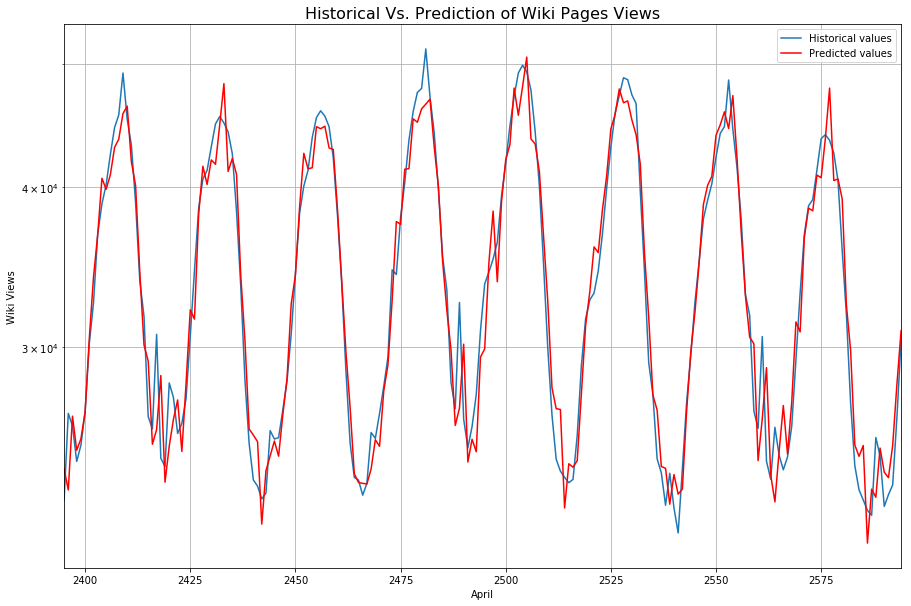

In [40]:
train_df['arima_model'] = invboxcox(best_model.fittedvalues, lmbda)

train_df.y.tail(200).plot()
train_df.arima_model[13:].tail(200).plot(color='r')
plt.ylabel('Wiki Views')
plt.legend(loc="upper right",labels=['Historical values','Predicted values'])
plt.xlabel('April')
plt.grid(True,which='both')
plt.yscale('log')
plt.title('Historical Vs. Prediction of Wiki Pages Views',fontsize=16);